<a href="https://colab.research.google.com/github/SWT17/Bachelor_project/blob/main/w1_logistic_regression_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
#load packages
import numpy as np
import sklearn.model_selection
import matplotlib.pyplot as plt


In [6]:
#make helper functions

def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()


In [3]:
#load data

from mlxtend.data import mnist_data
X, y = mnist_data()


#we just focus on 1's and 0's:
keep=(y==0) | (y==1)
X=X[keep,:]
y=y[keep]

y=np.expand_dims(y,1)

#y = y[0:3]
#X=X[0:3]

1000
(784,)


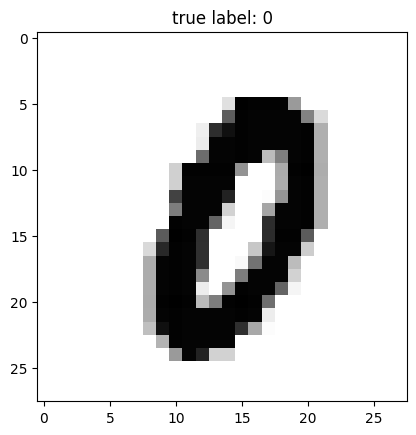

In [32]:
#inspect data
print(len(y))
#(plot digit)
(print(X[2].shape))
plot_digit(X, y,2)


In [60]:
# create a loss function:
def avrLoss(y,a):

  #INSERT CODE
    import numpy as np
    epsilon = 1e-10  # Small constant to avoid log(0) issues
    batch_size = len(y)
    losses = []

    # Calculate the individual losses for each example in the batch
    for i in range(batch_size):
      losses.append(-(y[i] * np.log(a[i] + epsilon) + (1 - y[i]) * np.log(1 - a[i] + epsilon)))

    # Calculate the average loss for the batch
    avg_loss = np.mean(losses[:])

    return avg_loss

In [61]:
#test loss function:
#(just run this cell and see what happens)

loss=avrLoss(np.array([0,1,0,1]),np.linspace(.1,.9,4))
print(loss)
assert np.all(np.around(loss,9)==0.554331312)


0.5543313120688863


In [158]:
#create a sigmoid
def sigmoid(z):
  #INSERT CODE
  import math
  if z > 101:
    z = 100
  if z <-100:
    z = -100

  val = 1 / (1 + np.exp(-z))
  #print(val)
  return val


In [157]:
#check sigmoid
#(just run this cell and see what happens)
out=sigmoid(np.array(range(-5,5)))
print(out)
assert np.all(np.around(out,8)==np.array([0.00669285, 0.01798621, 0.04742587, 0.11920292, 0.26894142, 0.5, 0.73105858, 0.88079708, 0.95257413, 0.98201379]))

[0.00669285 0.01798621 0.04742587 0.11920292 0.26894142 0.5
 0.73105858 0.88079708 0.95257413 0.98201379]


In [139]:
#make test & train data

Xtrain,Xtest,ytrain,ytest=sklearn.model_selection.train_test_split(X,y,test_size=0.3,shuffle=True)

In [242]:
#FINAL VERSION
#data format:
_ytrain = ytrain[:,0]
_ytest = ytest[:,0]

#Traning values:
nEpoch=8
trainRate=0.00001 #pick a number less than 1. Any bigger and it converts in first Epoc
accuracy=np.zeros(nEpoch)

#INITIATE WEIGHTS AND BIASES (w,b)
b = 0.5
w = np.random.random(len(Xtrain[1]))

#Batches:
bs = 100 #100 batches and 7 images in each batch
Xbatches = np.array_split(Xtrain[:], bs)
ybatches = np.array_split(ytrain[:], bs)


for iTrain in range(nEpoch):
  for j in range(bs): #7 images in each batch
      Xbatch = Xbatches[j]
      ybatch = ybatches[j]
      yval = ybatch[:,0].tolist()

      a_ = []
      for Xval in Xbatch:
        z = np.matmul(w,Xval)+b
        a = sigmoid(z)
        a_.append(a)

      #update weights
      wu = []
      for u in range(7):
        wgrad = (a_[u]-yval[u])*Xbatch[u]
        wu.append(wgrad)
        w = w - trainRate*wgrad

        bgrad = a_[u]-yval[u]
        b = b - trainRate*bgrad

      #w = w - np.mean(wu, axis = 0)

      #calculate loss & accuracy
      loss = avrLoss(yval,a_)
      yhat=a>.5
      accuracy[iTrain]=np.mean(yhat==ytrain)

  if np.mod(iTrain,1)==0:
    print()
    print("Epoc: ", iTrain)
    print("loss: ", loss)
    print("accuracy: ", accuracy[iTrain])

    ytemp = sigmoid(np.matmul(Xtrain,w)+b)
    _Y_prediction_train = ytemp[:]
    print("train accuracy: {} %".format(100 - np.mean(np.abs(_Y_prediction_train - _ytrain)) * 100))


print()
print("________________________________________")
print()
print("Traning complete")
print("________________________________________")
print()

print("Number of Epochs: ", nEpoch)
print("TrainRate: ", trainRate)
print("Parameters: ", len(w)+ 1) #1 for bias
print()

ytemp = sigmoid(np.matmul(Xtrain,w)+b)
_Y_prediction_train = ytemp[:]
print("train accuracy: {} %".format(100 - np.mean(np.abs(_Y_prediction_train - _ytrain)) * 100))

_Y_prediction_test = sigmoid(np.matmul(Xtest,w)+b)
print("test accuracy: {} %".format(100 - np.mean(np.abs(_Y_prediction_test - _ytest)) * 100))

print()
print()


Epoc:  0
loss:  9.868221827060196
accuracy:  0.49
train accuracy: 64.71463367963565 %

Epoc:  1
loss:  -1.000000082690371e-10
accuracy:  0.51
train accuracy: 94.85714285714286 %

Epoc:  2
loss:  -1.000000082690371e-10
accuracy:  0.51
train accuracy: 96.73484437238892 %

Epoc:  3
loss:  -1.000000082690371e-10
accuracy:  0.51
train accuracy: 98.42857233707596 %

Epoc:  4
loss:  -1.000000082690371e-10
accuracy:  0.51
train accuracy: 98.7142857142857 %

Epoc:  5
loss:  -1.000000082690371e-10
accuracy:  0.51
train accuracy: 98.85667413104794 %

Epoc:  6
loss:  -1.000000082690371e-10
accuracy:  0.51
train accuracy: 99.0 %

Epoc:  7
loss:  -1.000000082690371e-10
accuracy:  0.51
train accuracy: 99.14285714285472 %

________________________________________

Traning complete
________________________________________

Number of Epochs:  8
TrainRate:  1e-05
Parameters:  785

train accuracy: 99.14285714285472 %
test accuracy: 99.0 %




<ipython-input-158-7eb9579ba5a3>:10: RuntimeWarning: overflow encountered in exp
  val = 1 / (1 + np.exp(-z))


In [235]:
#multi image batch...
nEpoch=25
trainRate=0.00001 #pick a number less than 1
accuracy=np.zeros(nEpoch)

#INITIATE WEIGHTS AND BIASES (w,b)
b = 0.25
w = np.random.random(len(Xtrain[1]))
#print("initial w:", w[130:135])
#print("initial sum w:", sum(w[130:135]))

#batches:
bs = 100 #100 batches and 7 images in each batch
Xbatches = np.array_split(Xtrain[:], bs)
ybatches = np.array_split(ytrain[:], bs)

for iTrain in range(nEpoch):
  for j in range(bs): #7 images in each batch
      Xbatch = Xbatches[j]
      ybatch = ybatches[j]
      yval = ybatch[:,0].tolist()
      # Vi har nu 7 X-sæt

      a_ = []
      for Xval in Xbatch:
        z = np.matmul(w,Xval)+b
        #print(z)
        a = sigmoid(z)
        a_.append(a)

      #update weights
      wu = []
      for u in range(7):
        #print("yval: ", yval[u])
        #print("a: ", a_[u])

        #test = (a_[u]-yval[u])
        #print(a_[u]-yval[u])
        #print(Xbatch[u])
        #print(test*Xbatch[u])
        wgrad = (a_[u]-yval[u])*Xbatch[u]
        wu.append(wgrad)
        w = w - trainRate*wgrad
        #print(sum(w))

        bgrad = a_[u]-yval[u]
        b = b - trainRate*bgrad

      #w = w - np.mean(wu, axis = 0)

      #calculate loss & accuracy
      loss = avrLoss(yval,a_)
      yhat=a>.5
      accuracy[iTrain]=np.mean(yhat==ytrain)

  if np.mod(iTrain,1)==0:
    print("Epoc: ", iTrain)
    #print("loss: ", loss)
    #print("accuracy: ", accuracy[iTrain])
    #print("w:", w[130:135])

    ytemp = sigmoid(np.matmul(Xtrain,w)+b)#>0.5
    #q =700
    #yp = Y_prediction_train[0:q].tolist()
    _Y_prediction_train = ytemp[:]
    #print("ypred: ", yp)

    _ytrain = ytrain[:,0]
    #print("ytrain: ", ytt)
    #print("dif: ",np.mean(np.abs(yp - ytt)))
    print("train accuracy: {} %".format(100 - np.mean(np.abs(_Y_prediction_train - _ytrain)) * 100))
    #print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - ytrain)) * 100))



print()
print("________________________________________")
print()
print("Traning complete")
print("________________________________________")
print()


ytemp = sigmoid(np.matmul(Xtrain,w)+b)
_Y_prediction_train = ytemp[:]
print("train accuracy: {} %".format(100 - np.mean(np.abs(_Y_prediction_train - _ytrain)) * 100))

_ytest = ytest[:,0]
_Y_prediction_test = sigmoid(np.matmul(Xtest,w)+b)
print("test accuracy: {} %".format(100 - np.mean(np.abs(_Y_prediction_test - _ytest)) * 100))

print()
print()

<ipython-input-158-7eb9579ba5a3>:10: RuntimeWarning: overflow encountered in exp
  val = 1 / (1 + np.exp(-z))


Epoc:  0
train accuracy: 69.72320505219443 %
Epoc:  1
train accuracy: 95.2857142857156 %
Epoc:  2
train accuracy: 96.94102407105143 %
Epoc:  3
train accuracy: 98.00000000352587 %
Epoc:  4
train accuracy: 98.00491033290028 %
Epoc:  5
train accuracy: 98.14285718026426 %
Epoc:  6
train accuracy: 98.42857710386161 %
Epoc:  7
train accuracy: 98.59172454008824 %
Epoc:  8
train accuracy: 98.71401528918551 %
Epoc:  9
train accuracy: 98.71436515771795 %
Epoc:  10
train accuracy: 99.05900381001476 %
Epoc:  11
train accuracy: 99.28546468879435 %
Epoc:  12
train accuracy: 99.38411914599806 %
Epoc:  13
train accuracy: 99.05750269049615 %
Epoc:  14
train accuracy: 99.42727413396379 %
Epoc:  15
train accuracy: 99.3503951441681 %
Epoc:  16
train accuracy: 99.42730083198124 %
Epoc:  17
train accuracy: 99.42913035197336 %
Epoc:  18
train accuracy: 99.45539946845551 %
Epoc:  19
train accuracy: 99.57019271966918 %
Epoc:  20
train accuracy: 99.68587271697882 %
Epoc:  21
train accuracy: 99.61079458227131 %


In [165]:

nEpoch=5
trainRate=0.1 #pick a number less than 1

accuracy=np.zeros(nEpoch)

#INITIATE WEIGHTS AND BIASES (w,b)
w = np.random.random(len(Xtrain[1]))
b = 0.0

print("w:", w[200:210])
#Create one datastructure with all X, y and w values:
#data = np.array([Xtrain[:], ytrain[:], w[:]])

#batches:
#batch_size = 784 / 56 #14
bs = 784

for iTrain in range(nEpoch):

  for i in range(1): #700 all images
    # Split the array into 56 batches with 14 pixels each
    Xval =  Xtrain[i,:]
    Xbatches = np.array_split(Xval[:], bs)

    wbatches = np.array_split(w[:], bs)
    yval = ytrain[i,0]

    inx = 0

    for j in range(bs): #56 all batches in each image
      Xbatch = Xbatches[j]
      wbatch = wbatches[j]

      # Element-wise multiplication and sum
      z = np.sum(wbatch * Xbatch)+b
      #z = np.matmul(wbatch,Xbatch)+b
      a = sigmoid(z)
      #print(a)

      #calculate loss & accuracy
      loss = avrLoss(yval,a)

      yhat=a>.5
      accuracy[iTrain]=np.mean(yhat==ytrain)

      #update weights
      #wgrad = np.array([h * (a-yval)*trainRate for h in Xbatch])
      wgrad = (a-yval)*trainRate*Xbatch[:]
      #print(wgrad)
      bgrad = a-yval

      assert(wgrad.shape == wbatch.shape)

      #UPDATE W AND b
      ww = wbatch[:]*wgrad
      #print(ww)
      #print(wbatch[:])
      #w[inx:inx+14] = ww
      w[inx] = ww
      #b = bgrad-trainRate*bgrad
      #inx = inx + 14
      inx = inx + 1

  if np.mod(iTrain,1)==0:
    print("Epoc: ", iTrain)
    print("loss: ", loss)
    print("accuracy: ", accuracy[iTrain])
    #print("w: ", w[241])
    print("w:", w[200:210])


print("w:", w[200:210])
Y_prediction_test = sigmoid(np.matmul(Xtest,w)+b)>0.5
Y_prediction_train = sigmoid(np.matmul(Xtrain,w)+b)>0.5

print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - ytrain)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - ytest)) * 100))

w: [0.8938284  0.6018951  0.6189382  0.09482611 0.90270949 0.91533046
 0.02979275 0.6184958  0.94612316 0.66629531]


TypeError: ignored

In [241]:
inx = 0
w = np.random.random(5)
print(w)

ww = [3,3,3]
w[inx:inx+3] = ww
print(w)

a = 0.6
yval = 0
www = [i * (a-yval) for i in ww]
#www=(a-yval)*ww
print(www)

#print(ytrain[2])
#print(yval)

k = np.array([ww])
kk = np.array([ww])
b = 0
g = k*kk
print(g)
z = np.sum(k * k)+b
print(z)

[0.69652199 0.72034502 0.15367086 0.30941065 0.822279  ]
[3.         3.         3.         0.30941065 0.822279  ]
[1.7999999999999998, 1.7999999999999998, 1.7999999999999998]
[[9 9 9]]
27


In [167]:
from pandas.core.algorithms import diff
#train

#INITIATE WEIGHTS AND BIASES (w,b)
w = np.random.random(len(Xtrain[1]))
#print(len(w))
b = 0
#Please make w a vector with the same number of weights
#as the number of pixels in each image, and make b a scalar.

nEpoch=2
Batch_size = 10

accuracy=np.zeros(nEpoch)

trainRate=0.05 #pick a number less than 1

#batch
batch_size = 784
num_samples = len(Xtrain)
num_pixels = 28*28

# Calculate the number of batches
#num_batches = num_samples // batch_size
num_batches = 1

# Reshape Xtrain to flatten the image dimensions
Xtrain_flat = Xtrain.reshape(num_samples, -1)

#print(ytrain[3][0])
# Split Xtrain and ytrain into batches while maintaining pixel-image association

#data with both x and y
j = 0
for j in range (3):
  data = [Xtrain[j][:], ytrain[j][0]]


arr = np.array([1, 2, 3])

k = arr[:]
#print(k)


#batches:
# Determine the batch size
batch_size = 784 / 56 #14
#batch number = 56

kk = 0
for image in Xtrain[:]:
  #print(image)
  if kk < 56:
    # Split the array into 56 batches with 14 pixels each
    batch = np.array_split(image[:], 56)
    print("batch:")
    #print(batch[:][:]) # whole image
    print(batch[:][23]) # middel of image

    #need batch of weights... and the same for y-values....
    kk = kk+1


kk = 1
if kk == 0:
    # Split the array into 56 batches with 14 pixels each
    Xbatch = np.array_split(Xval[:], 56)
    print("Xbatch:")
    #print(batch[:][:]) # whole image
    print(Xbatch[:][23]) # middel of image

    print("ybatch:")
    ybatch = np.array_split(yval[:], 56)
    print(ybatch[:][23]) # middel of image

    print("wbatch:")
    wbatch = np.array_split(wval[:], 56)
    print(wbatch[:][23]) # middel of image

    #need batch of weights... and the same for y-values....

    testX = data[0]
    #b = testX[700,:]

    testy = data[1]
    bb = testy[:,0]

    testw = data[2]
    bbb = testw[:]

    bbbb = np.array_split(bb, 56)



batch:
[  0.   0.   0.   0.   0.   0. 138. 252. 183.   0.   0.   0.   0.   0.]
batch:
[  0.   0.   0.   0.   0.  11. 183. 253. 253. 253.  37.   0.   0.   0.]
batch:
[  0.  41. 226. 253. 253. 139.   0.   0.   0.   0.   0.   0.   0.   0.]
batch:
[  0.   0.   0.   0.   0.  68. 253. 253. 249. 131.   0.   0.   0.   0.]
batch:
[  0.   0.   0.   0.   0.   0. 174. 253. 191.   0.   0.   0.   0.   0.]
batch:
[ 62.  61.   0.   0.   0.   0.   0. 253. 252. 175.   0.   0.   0.   0.]
batch:
[253. 250.  67.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
batch:
[ 30. 215. 253. 253. 129.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
batch:
[ 92. 254. 253. 234.  40.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
batch:
[253. 253. 136.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
batch:
[  0.   0.   0.   0.   0.  25. 127. 252. 252. 120.   0.   0.   0.   0.]
batch:
[  0.   0.  16.  24. 152. 253. 253. 253. 195.  28.   0.   0.   0.   0.]
batch:
[  0.   0.   0.   0.   0. 117. 250.  99.   0.

In [35]:
from pandas.core.algorithms import diff
#train

#INITIATE WEIGHTS AND BIASES (w,b)
w = np.random.random(len(Xtrain[1]))
#print(len(w))
b = 0
#Please make w a vector with the same number of weights
#as the number of pixels in each image, and make b a scalar.

nEpoch=2
Batch_size = 10

accuracy=np.zeros(nEpoch)

trainRate=0.05 #pick a number less than 1

#batch
batch_size = 14
num_samples = len(Xtrain)

# Calculate the number of batches
num_batches = num_samples // batch_size

print(XTrain.shape)

# Split Xtrain and ytrain into batches
batches = [(Xtrain[i * batch_size: (i + 1) * batch_size], ytrain[i * batch_size: (i + 1) * batch_size]) for i in range(num_batches)]


#print(batches[1].shape)
for iTrain in range(nEpoch):
  #evaluate
  #CALCULATE a
  for batch in batches:
     z = np.matmul(w.transpose(),batch)+b
     a = sigmoid(z)

    #calculate loss & accuracy
     loss = avrLoss(yt,a)
    #print("Loss: ", loss)




  #Xt = Xtrain[:,:]
  #yt = ytrain[:,:]

  #z = np.matmul(w.transpose(),Xt)+b
    #print("z:", z.shape)
#  a = sigmoid(z)
    #print("a", a)

    #print("y-train shape:",ytrain.shape)
    #y = ytrain[1,:]

    #calculate loss & accuracy
  loss = avrLoss(yt,a)
    #print("Loss: ", loss)

  yhat=a>.5
  accuracy[iTrain]=np.mean(yhat==ytrain)

    #update weights
  wgrad = (a-yt)*Xt[i]
  bgrad = a-yt

    #print("grad:")
  print("wgrad: ", wgrad.shape)
  print(w.shape)

  assert(wgrad.shape == w.shape)

    #UPDATE W AND b
  ww = (w[i]-trainRate*wgrad)
  w[i] = ww
    #print(ww)
  b = bgrad-trainRate*bgrad
    #print("loss: ",loss)
print("Epoch:", iTrain, "   Loss: ", loss)
print(wgrad)

if np.mod(iTrain,10)==0:
  print("ITrian: ", iTrain,loss,accuracy[iTrain])

Y_prediction_test = sigmoid(np.matmul(Xtest,w)+b)>0.5
Y_prediction_train = sigmoid(np.matmul(Xtrain,w)+b)>0.5

print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - ytrain)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - ytest)) * 100))

NameError: ignored

In [ ]:
#see what the network does:

img = w.reshape(28,28)
h=plt.imshow(img, cmap='Greys',  interpolation='nearest')
plt.colorbar(h)
plt.show()

In [216]:
#commpare with scikit-learn:

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(Xtrain, ytrain)

clf.predict(X)
print('Train accuracy: ',clf.score(Xtrain, ytrain))
print('Test accuracy: ',clf.score(Xtest, ytest))

img = (clf.coef_).reshape(28,28)
plt.imshow(img, cmap='Greys',  interpolation='nearest')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored